## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [1]:
# code here to arrive at a baseline prediction

### Import our Final CSV from our Data Preparation and Cleaning Notebook

In [2]:
#Import libraries
# Standard Packages
import pandas as pd
import numpy as np

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Scipy Stats
import scipy.stats as stats 

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler,  OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

# Suppress future and deprecation warnings
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [6]:
final_kc_df = pd.read_csv('/Users/aheinke/Documents/Flatiron/NYC-DS-010923/Phase_2/Phase2_Final_Proj/final_kc.csv')

In [7]:
#Reminder of what it looks like.
final_kc_df.head()

,Unnamed: 0,level_0,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,...,address,lat,long,Zip Code,DistrictName,ELA,Math,Science,zipcodes,District Test Score
0,0,0,0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,...,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,Renton School District,42.9,32.5,33.3,"['98006', '98031', '98032', '98055', '98056', ...",36.23
1,1,4,4,2873000690,6/11/2021,680000.0,4,3.0,2130,7649,...,"20432 130th Place Southeast, Kent, Washington ...",47.418155,-122.16696,98031,Renton School District,42.9,32.5,33.3,"['98006', '98031', '98032', '98055', '98056', ...",36.23
2,2,10,10,5469700570,6/23/2021,810000.0,5,3.0,3030,24759,...,"12605 Southeast 235th Street, Kent, Washington...",47.390790,-122.17303,98031,Renton School District,42.9,32.5,33.3,"['98006', '98031', '98032', '98055', '98056', ...",36.23
3,3,28,28,7399301200,3/29/2022,728000.0,4,2.0,2170,7520,...,"1814 Aberdeen Avenue Southeast, Renton, Washin...",47.463930,-122.18974,98055,Renton School District,42.9,32.5,33.3,"['98006', '98031', '98032', '98055', '98056', ...",36.23
4,4,50,50,9899200050,3/24/2022,565000.0,4,2.0,1400,10364,...,"3426 Shattuck Avenue South, Renton, Washington...",47.448450,-122.21243,98055,Renton School District,42.9,32.5,33.3,"['98006', '98031', '98032', '98055', '98056', ...",36.23


In [8]:
#Remove uninformative columns 
final_kc_df= final_kc_df.drop(labels=['index','id', 'date','Unnamed: 0','address','lat','long', 'yr_renovated',\
                                     'zipcodes'], axis=1)

In [9]:
#Let's look at our shape after removing those columns.
final_kc_df.shape

(7545, 25)

In [10]:
final_kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7545 entries, 0 to 7544
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   level_0              7545 non-null   int64  
 1   price                7545 non-null   float64
 2   bedrooms             7545 non-null   int64  
 3   bathrooms            7545 non-null   float64
 4   sqft_living          7545 non-null   int64  
 5   sqft_lot             7545 non-null   int64  
 6   floors               7545 non-null   float64
 7   waterfront           7545 non-null   object 
 8   greenbelt            7545 non-null   object 
 9   view                 7545 non-null   object 
 10  condition            7545 non-null   object 
 11  grade                7545 non-null   object 
 12  heat_source          7545 non-null   object 
 13  sewer_system         7545 non-null   object 
 14  sqft_above           7545 non-null   int64  
 15  sqft_basement        7545 non-null   i

### First  Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

In [8]:
# code here for your first 'substandard' model

In [11]:
# Prepare data

#Using only numeric data for our first model and not using Science due to its Null values
X = final_kc_df.drop(['price','waterfront','greenbelt','view','condition', 'grade', 'heat_source',\
                      'sewer_system', 'DistrictName', 'Science'], axis=1)
y = final_kc_df['price']

In [12]:
# Test/Train Split: Train is 80% of Data, Test is 20% of Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
# Instantiate model
lr_simple_model = LinearRegression()

# Fit model
first_result = lr_simple_model.fit(X_train, y_train)

In [12]:
# code here to evaluate your first 'substandard' model

In [14]:
# Retrieve estimated slope coefficient
first_result.coef_

array([ 9.69432944e-02, -2.20033022e+04,  3.81756692e+04,  1.21079118e+02,
        2.88730003e-01,  2.82203965e+04,  2.58319843e+01,  7.83090635e+00,
        1.05576244e+01,  8.14898092e+01, -9.14827519e+02,  1.05864586e+03,
        4.05479384e+04,  2.81946900e+04, -6.18451143e+04])

In [15]:
# Retrieve estimated y-intercept coefficient
first_result.intercept_

-102037286.28063436

In [16]:
#GIVES US OUR R**2
print("First Model Train:" , lr_simple_model.score(X_train, y_train))
print("First Model Test:" , lr_simple_model.score(X_test, y_test))

First Model Train: 0.4109887633221857
First Model Test: 0.4171637001348958


In [17]:
#MEAN ABSOLUTE ERROR
metrics.mean_absolute_error(y_test, lr_simple_model.predict(X_test))

168900.00967397194

### Modeling Iterations

Before we create another model we should look for Multicollinearity and ensure that our predictive variables are indeed independent.

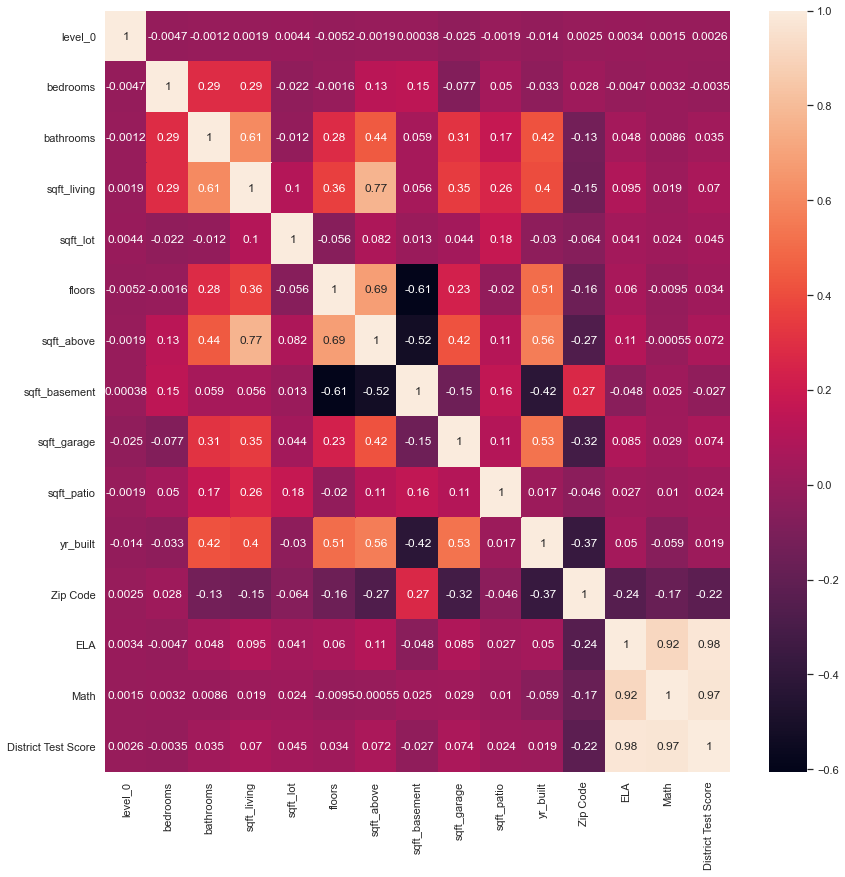

In [18]:
#Heatmap for Collinearity
sns.set(rc={'figure.figsize':(14, 14)})
sns.heatmap(X_train.corr(),annot=True);

In [21]:
#View Correlation between Independent Numeric Variables
X_train.corr()

,level_0,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,Zip Code,ELA,Math,District Test Score
level_0,1.000000,-0.004654,-0.001219,0.001938,0.004383,-0.005158,-0.001941,0.000378,-0.024857,-0.001852,-0.013510,0.002511,0.003375,0.001474,0.002631
bedrooms,-0.004654,1.000000,0.287574,0.289964,-0.022129,-0.001577,0.131921,0.145766,-0.077268,0.049754,-0.032551,0.027874,-0.004689,0.003239,-0.003519
bathrooms,-0.001219,0.287574,1.000000,0.605667,-0.012489,0.280741,0.442661,0.058739,0.311968,0.173215,0.420548,-0.134205,0.047834,0.008579,0.034599
sqft_living,0.001938,0.289964,0.605667,1.000000,0.103518,0.358054,0.768031,0.055648,0.347068,0.256723,0.399179,-0.147075,0.095266,0.019054,0.069536
sqft_lot,0.004383,-0.022129,-0.012489,0.103518,1.000000,-0.055731,0.082396,0.012820,0.044178,0.177305,-0.029884,-0.064384,0.041172,0.023560,0.044609
floors,-0.005158,-0.001577,0.280741,0.358054,-0.055731,1.000000,0.685732,-0.605222,0.231631,-0.019656,0.510622,-0.158480,0.060208,-0.009510,0.034081
sqft_above,-0.001941,0.131921,0.442661,0.768031,0.082396,0.685732,1.000000,-0.524742,0.420535,0.110302,0.564332,-0.268970,0.108629,-0.000550,0.072102
sqft_basement,0.000378,0.145766,0.058739,0.055648,0.012820,-0.605222,-0.524742,1.000000,-0.149099,0.158955,-0.422113,0.266409,-0.047861,0.025437,-0.026582
sqft_garage,-0.024857,-0.077268,0.311968,0.347068,0.044178,0.231631,0.420535,-0.149099,1.000000,0.108483,0.526155,-0.317434,0.085148,0.028573,0.074463
sqft_patio,-0.001852,0.049754,0.173215,0.256723,0.177305,-0.019656,0.110302,0.158955,0.108483,1.000000,0.017343,-0.046256,0.027298,0.010032,0.023954


#### Second Model

In [17]:
# code here to iteratively improve your models

In [19]:
final_kc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7545 entries, 0 to 7544
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   level_0              7545 non-null   int64  
 1   price                7545 non-null   float64
 2   bedrooms             7545 non-null   int64  
 3   bathrooms            7545 non-null   float64
 4   sqft_living          7545 non-null   int64  
 5   sqft_lot             7545 non-null   int64  
 6   floors               7545 non-null   float64
 7   waterfront           7545 non-null   object 
 8   greenbelt            7545 non-null   object 
 9   view                 7545 non-null   object 
 10  condition            7545 non-null   object 
 11  grade                7545 non-null   object 
 12  heat_source          7545 non-null   object 
 13  sewer_system         7545 non-null   object 
 14  sqft_above           7545 non-null   int64  
 15  sqft_basement        7545 non-null   i

In [28]:
# Removing some of the features that we may not need; 'sqft_above' being removed as it too closely correlates with
# 'sqft_living' and removing 'Science' as it contains null values.
final_kc_df2 = final_kc_df.drop(['level_0', 'sqft_above', 'waterfront', 'greenbelt','view', 'Science'], axis = 1)

##### Preparing Data

In [29]:
X = final_kc_df2.drop('price', axis=1)
y = final_kc_df2['price']

##### Train/Test Split
*Train 80% of Data, Test 20% of Data*

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##### Processing Data

In [31]:
#Train Data
y_train.shape

(6036,)

In [32]:
#Test Data
y_test.shape

(1509,)

##### Separate Continuous X Predictive Variables
*Train Data*

In [ ]:
#Define our columns with numeric data
numeric_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_basement',\
                           'sqft_garage','sqft_patio','yr_built','ELA','Math','Zip Code','District Test Score']]

In [33]:
X_train_numeric = X_train[numeric_cols]

*Test Data*

In [34]:
X_test_numeric = X_test[numeric_cols]

##### Discrete Ordinal X Predictive Variables
*Train Data*

In [35]:
ord_cat_selector = ['condition', 'grade']
X_train_ord_cat_subset = X_train[ord_cat_selector]

In [36]:
X_train_ord_cat_subset['condition'].unique()

array(['Average', 'Very Good', 'Good'], dtype=object)

In [37]:
X_train_ord_cat_subset['grade'].unique()

array(['8 Good', '7 Average', '10 Very Good', '9 Better', '6 Low Average',
       '5 Fair', '11 Excellent', '13 Mansion'], dtype=object)

In [38]:
# REPLACE WITH COLUMN'S UNIQUE VALUES IN ASCENDING ORDER --->
condition_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good'] 
grade_list = ['3 Poor', '5 Fair', '6 Low Average', '7 Average','8 Good','9 Better','10 Very Good','11 Excellent',\
             '12 Luxury','13 Mansion']

In [39]:
o_enc = OrdinalEncoder(categories = [condition_list, grade_list])
o_enc.fit(X_train_ord_cat_subset)

OrdinalEncoder(categories=[['Poor', 'Fair', 'Average', 'Good', 'Very Good'],
                           ['3 Poor', '5 Fair', '6 Low Average', '7 Average',
                            '8 Good', '9 Better', '10 Very Good',
                            '11 Excellent', '12 Luxury', '13 Mansion']])

In [40]:
o_enc.transform(X_train_ord_cat_subset)

array([[2., 4.],
       [4., 3.],
       [3., 6.],
       ...,
       [2., 5.],
       [2., 4.],
       [2., 3.]])

In [41]:
X_train_ord = pd.DataFrame(o_enc.transform(X_train_ord_cat_subset),
                        columns = X_train_ord_cat_subset.columns)

In [42]:
X_train_ord.head()

,condition,grade
0,2.0,4.0
1,4.0,3.0
2,3.0,6.0
3,3.0,3.0
4,3.0,3.0


*Test Data*

In [43]:
X_test_ord_cat_subset = X_test[ord_cat_selector]

In [44]:
X_test_ord = pd.DataFrame(o_enc.transform(X_test_ord_cat_subset),
                        columns = X_test_ord_cat_subset.columns)

##### Discrete Nominal X Predictive Variables
*Train Data*

In [45]:
onehot_enc = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [46]:
nominal_cols = ['heat_source', 'sewer_system', 'DistrictName']
onehot_enc.fit_transform(X_train[nominal_cols])

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [47]:
X_train_nom_trans = onehot_enc.fit_transform(X_train[nominal_cols])
X_train_nom_trans.shape

(6036, 28)

In [48]:
cols = onehot_enc.get_feature_names()

In [49]:
X_train_nom = pd.DataFrame(X_train_nom_trans, columns = cols)
X_train_nom.head()

,x0_Electricity,x0_Electricity/Solar,x0_Gas,x0_Gas/Solar,x0_Oil,x0_Oil/Solar,x0_Other,x1_PRIVATE,x1_PUBLIC,x1_PUBLIC RESTRICTED,...,x2_Northshore School District,x2_Renton School District,x2_Riverview School District,x2_Seattle School District No. 1,x2_Shoreline School District,x2_Skykomish School District,x2_Snoqualmie Valley School District,x2_Tahoma School District,x2_Tukwila School District,x2_Vashon Island School District
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


*Test Data*

In [50]:
X_test_nom_trans = onehot_enc.transform(X_test[nominal_cols])
X_test_nom_trans.shape

(1509, 28)

In [51]:
X_test_nom = pd.DataFrame(X_test_nom_trans, columns = cols)

##### Combine Discrete/Categorical X/ Predictive Variables

In [52]:
#combine all catergorical variables

X_train_cat_df = pd.concat([X_train_ord,X_train_nom],axis = 1)
X_train_cat_df

,condition,grade,x0_Electricity,x0_Electricity/Solar,x0_Gas,x0_Gas/Solar,x0_Oil,x0_Oil/Solar,x0_Other,x1_PRIVATE,...,x2_Northshore School District,x2_Renton School District,x2_Riverview School District,x2_Seattle School District No. 1,x2_Shoreline School District,x2_Skykomish School District,x2_Snoqualmie Valley School District,x2_Tahoma School District,x2_Tukwila School District,x2_Vashon Island School District
0,2.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,3.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6031,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6032,2.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6033,2.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6034,2.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*Test Data*

In [53]:
X_test_cat_df = pd.concat([X_test_ord,X_test_nom],axis = 1)

#### Combine Continuous and Discrete X/ Predictive Variables

In [54]:
#Train Data - Combine all processed X Variables
X_process_train = pd.concat([X_train_numeric.reset_index(),X_train_cat_df],axis = 1)

In [55]:
X_process_train.head()

,index,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,sqft_garage,sqft_patio,yr_built,...,x2_Northshore School District,x2_Renton School District,x2_Riverview School District,x2_Seattle School District No. 1,x2_Shoreline School District,x2_Skykomish School District,x2_Snoqualmie Valley School District,x2_Tahoma School District,x2_Tukwila School District,x2_Vashon Island School District
0,1786,4,2.5,2370,4000,2.0,0,400,70,2021,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4113,4,3.0,2360,9000,1.0,1460,560,370,1964,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,7488,5,3.5,3510,12729,2.0,0,480,680,1980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4207,4,2.5,2130,7000,2.0,950,520,470,1995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2833,5,3.0,3120,2963,2.0,1130,0,0,1930,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
X_process_train.shape

(6036, 44)

In [57]:
X_process_train.isnull().sum()

index                                   0
bedrooms                                0
bathrooms                               0
sqft_living                             0
sqft_lot                                0
floors                                  0
sqft_basement                           0
sqft_garage                             0
sqft_patio                              0
yr_built                                0
ELA                                     0
Math                                    0
Zip Code                                0
District Test Score                     0
condition                               0
grade                                   0
x0_Electricity                          0
x0_Electricity/Solar                    0
x0_Gas                                  0
x0_Gas/Solar                            0
x0_Oil                                  0
x0_Oil/Solar                            0
x0_Other                                0
x1_PRIVATE                        

*Test Data*

In [58]:
X_process_test = pd.concat([X_test_numeric.reset_index(),X_test_cat_df],axis = 1)

#### Scale the Data

In [59]:
# Now we'll apply it to our data by using the .fit() (calculates stds and means) and .transform() methods.
ss = StandardScaler()
#Train Data
ss.fit(X_process_train)
X_standard_process_train = ss.transform(X_process_train)

#Test Data
X_standard_process_test = ss.transform(X_process_test)

In [60]:
pd.DataFrame(X_standard_process_train, columns = X_process_train.columns).isna().sum()

index                                   0
bedrooms                                0
bathrooms                               0
sqft_living                             0
sqft_lot                                0
floors                                  0
sqft_basement                           0
sqft_garage                             0
sqft_patio                              0
yr_built                                0
ELA                                     0
Math                                    0
Zip Code                                0
District Test Score                     0
condition                               0
grade                                   0
x0_Electricity                          0
x0_Electricity/Solar                    0
x0_Gas                                  0
x0_Gas/Solar                            0
x0_Oil                                  0
x0_Oil/Solar                            0
x0_Other                                0
x1_PRIVATE                        

#### Creating, Fitting, and Running the Model

In [61]:
# Instantiate model
lr_simple_model = LinearRegression()

# Fit model
result = lr_simple_model.fit(X_standard_process_train, y_train)

In [62]:
# Retrieve estimated slope coefficient
result.coef_

array([-6.22523591e+03, -2.76455816e+03,  1.52828187e+04,  6.49596087e+04,
        7.77153457e+03,  1.24729279e+04, -9.81306516e+03, -2.29335210e+03,
        9.43606419e+03, -9.60546018e+03, -3.73006950e+18, -1.80171727e+16,
       -1.54834085e+04,  3.31877757e+17,  3.28035170e+04,  7.08165410e+04,
        8.09299681e+17,  1.12534691e+17,  9.65941832e+17,  9.02659342e+16,
        6.14481416e+17,  3.01086073e+16,  5.21409957e+16,  2.07283352e+18,
        2.07414323e+18,  8.38954404e+16, -9.90312824e+17,  3.46981532e+17,
       -5.10625249e+17, -1.28632962e+18, -9.70252247e+17, -1.98980435e+18,
        5.97185891e+17,  4.99483841e+17,  5.45782599e+17, -9.90428599e+17,
        2.97777054e+17, -1.72490802e+16,  1.74184747e+17,  3.75336267e+17,
        3.89180152e+17,  4.99363693e+17, -1.39720714e+18, -1.78632050e+16])

In [63]:
# Retrieve estimated y-intercept coefficient
result.intercept_

902287.4297802623

In [64]:
#GIVES US OUR R**2
lr_simple_model.score(X_standard_process_train, y_train)

0.5285656912709116

*Test Data*

In [65]:
lr_simple_model.score(X_standard_process_test, y_test)

0.5270087699051671

#### Predictions
*Using Test Data*

In [66]:
y_hat = lr_simple_model.predict(X_standard_process_test)
y_hat

array([629676.05478026, 617615.42978026, 992620.05478026, ...,
       670892.05478026, 517548.05478026, 847788.05478026])

In [67]:
print("Final Model Train:" , lr_simple_model.score(X_standard_process_train, y_train))
print("Final Model Test:" , lr_simple_model.score(X_standard_process_test, y_test))

Final Model Train: 0.5285656912709116
Final Model Test: 0.5270087699051671


### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [19]:
# code here to show your final model

In [20]:
# Prepare data
X = final_kc_df.drop('price', axis=1)
y = final_kc_df['price']

In [21]:
# Test/Train Split - Train 80% of Data, Test 20% of Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Processing the Data

#### Continuous X/ Predictive Variables

In [22]:
#Separate Continuous X Variables from rest of X Variables

*Train Data*

In [23]:
#Define our columns with numeric data
numeric_cols = ['bathrooms','sqft_living','sqft_patio']

In [24]:
#Define our numeric training data
X_train_numeric = X_train[numeric_cols]

*Test Data*

In [25]:
#Define our numeric testing data
X_test_numeric = X_test[numeric_cols]

#### Discrete X/ Predictive Variables

#### Discrete Ordinal X/ Predictive Variables

In [26]:
#Separate Discrete Ordinal X Variables from rest of X Variables

*Train Data*

In [27]:
#Define our columns with ordinal data and create train data subset
ord_cat_selector = ['condition','grade']
X_train_ord_cat_subset = X_train[ord_cat_selector]

In [28]:
#View unique values in our ordinal columns
X_train_ord_cat_subset['condition'].unique()

array(['Average', 'Very Good', 'Good'], dtype=object)

In [29]:
X_train_ord_cat_subset['grade'].unique()

array(['8 Good', '7 Average', '10 Very Good', '9 Better', '6 Low Average',
       '5 Fair', '11 Excellent', '13 Mansion'], dtype=object)

In [30]:
# REPLACE WITH COLUMN'S UNIQUE VALUES IN ASCENDING ORDER --->
condition_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good'] 
grade_list = ['3 Poor', '5 Fair', '6 Low Average', '7 Average','8 Good','9 Better','10 Very Good','11 Excellent',\
             '12 Luxury','13 Mansion']

In [31]:
#Fit ordinal train data
o_enc = OrdinalEncoder(categories = [condition_list, grade_list])
o_enc.fit(X_train_ord_cat_subset)

OrdinalEncoder(categories=[['Poor', 'Fair', 'Average', 'Good', 'Very Good'],
                           ['3 Poor', '5 Fair', '6 Low Average', '7 Average',
                            '8 Good', '9 Better', '10 Very Good',
                            '11 Excellent', '12 Luxury', '13 Mansion']])

In [32]:
#Transform ordinal train data
o_enc.transform(X_train_ord_cat_subset)

array([[2., 4.],
       [4., 3.],
       [3., 6.],
       ...,
       [2., 5.],
       [2., 4.],
       [2., 3.]])

In [33]:
#Turn ordinal train data back into a dataframe
X_train_ord = pd.DataFrame(o_enc.transform(X_train_ord_cat_subset),
                        columns = X_train_ord_cat_subset.columns)

In [34]:
#Preview ordinal data to confirm numerical values have replaced unique values
X_train_ord.head()

,condition,grade
0,2.0,4.0
1,4.0,3.0
2,3.0,6.0
3,3.0,3.0
4,3.0,3.0


*Test Data*

In [35]:
#Define ordinal test subset
X_test_ord_cat_subset = X_test[ord_cat_selector]

In [36]:
#Transform ordinal test data
o_enc.transform(X_test_ord_cat_subset)

array([[3., 4.],
       [3., 3.],
       [2., 3.],
       ...,
       [3., 3.],
       [2., 3.],
       [2., 4.]])

In [37]:
#Turn ordinal test data back into a dataframe
X_test_ord = pd.DataFrame(o_enc.transform(X_test_ord_cat_subset),
                        columns = X_test_ord_cat_subset.columns)

#### Discrete Nominal  X/ Predictive Variables

In [38]:
#Separate Discrete Nominal X Variables from rest of X Variables

In [39]:
onehot_enc = OneHotEncoder(drop = 'first', sparse = False)

*Train Data*

In [68]:
#Define nominal columns
# nominal_cols = ['DistrictName'] 
# R2 is 52
nominal_cols = ['heat_source','sewer_system','yr_built','Zip Code']
# R2 is 58.7

In [69]:
#Fit and Transform nominal train data
X_train_nom_trans = onehot_enc.fit_transform(X_train[nominal_cols])

In [70]:
#View nominal train data shape
X_train_nom_trans.shape

(6036, 207)

In [71]:
#Get columns names
cols = onehot_enc.get_feature_names()

In [72]:
#Turn nominal train data back into a dataframe
X_train_nom = pd.DataFrame(X_train_nom_trans, columns = cols)
#Preview nominal train dataframe
X_train_nom.head()

,x0_Electricity,x0_Electricity/Solar,x0_Gas,x0_Gas/Solar,x0_Oil,x0_Oil/Solar,x0_Other,x1_PRIVATE,x1_PUBLIC,x1_PUBLIC RESTRICTED,...,x3_98155,x3_98166,x3_98168,x3_98177,x3_98178,x3_98188,x3_98198,x3_98199,x3_98288,x3_98354
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*Test Data*

In [73]:
# Transform nominal test data
X_test_nom_trans = onehot_enc.transform(X_test[nominal_cols])

In [46]:
#View nominal test data shape
X_test_nom_trans.shape

(1509, 209)

In [74]:
#Turn nominal test data back into a dataframe
X_test_nom = pd.DataFrame(X_test_nom_trans, columns = cols)

#### Combine Discrete/Categorical X/ Predictive Variables

*Train Data*

In [75]:
#Concatinating the ordinal and nominal training dataframes
X_train_cat = pd.concat([X_train_ord, X_train_nom],axis = 1)

*Test Data*

In [76]:
#Concatinating the ordinal and nominal testing dataframes
X_test_cat = pd.concat([X_test_ord, X_test_nom],axis = 1)

#### Combine Continuous and Discrete X/ Predictive Variables

*Train Data - Combine all processed X Variables*

In [77]:
#Resetting index so the data lines up
X_process_train = pd.concat([X_train_numeric.reset_index(),X_train_cat],axis = 1)
#Dropping the old index column
X_process_train = X_process_train.drop('index', axis = 1)

In [78]:
#Checking the new shape of our combined dataframe
X_process_train.shape

(6036, 222)

*Test Data - Combine all processed X Variables*

In [79]:
#Resetting index so the data lines up
X_process_test = pd.concat([X_test_numeric.reset_index(),X_test_cat],axis = 1)
#Dropping the old index column
X_process_test = X_process_test.drop('index', axis = 1)

#### Scale the Data

In [80]:
# Create a StandardScaler object to scale data
ss = StandardScaler()

*Train Data*

In [81]:
#Fit and Transforming Train Data with our StandardScaler object
ss.fit(X_process_train)
X_standard_process_train = ss.transform(X_process_train)

*Test Data*

In [82]:
#Fit and Transforming Test Data with our StandardScaler object
X_standard_process_test = ss.transform(X_process_test)

### Creating, Fitting, and Running the Model

In [83]:
# Instantiate model
lr_simple_model = LinearRegression()

# Fit model
final_result = lr_simple_model.fit(X_standard_process_train, y_train)

In [84]:
# code here to evaluate your final model

In [85]:
# Retrieve estimated slope coefficient
final_result.coef_

array([-1.40996751e+03,  1.05960097e+04,  7.62985727e+04,  1.95870682e+04,
       -2.90183740e+03, -1.61563999e+04,  4.52855674e+03,  4.96746641e+03,
       -3.75248352e+18, -1.33324864e+18, -1.21677227e+18, -2.13234160e+18,
       -3.12555685e+17,  3.83828952e+04,  6.35434325e+04, -7.28302435e+17,
       -1.01271867e+17, -8.69267349e+17, -8.12318368e+16, -5.52982192e+17,
       -2.70952436e+16, -4.69225616e+16, -4.08799383e+18, -4.09057681e+18,
       -1.65456627e+17, -6.04183638e+17, -3.08992603e+17, -2.64766988e+17,
       -3.99951181e+17, -4.72712640e+17, -3.62252738e+17, -4.62309629e+17,
       -4.33686822e+17, -6.05893763e+17, -5.98919845e+17, -6.23862101e+17,
       -5.34137026e+17, -4.52104601e+17, -5.54981850e+17, -4.60774630e+17,
       -5.08665530e+17, -5.65129547e+17, -3.13887866e+17, -6.43949167e+17,
       -4.32289538e+17, -4.76826160e+17, -5.00757903e+17, -2.93735836e+17,
       -4.57722539e+17, -5.07814150e+17, -6.18009272e+17, -6.59317904e+17,
       -5.79347438e+17, -

In [86]:
# Retrieve estimated y-intercept coefficient
final_result.intercept_

1109998.8783144616

In [87]:
#GIVES US OUR R**2
print("Final Model Train:" , lr_simple_model.score(X_standard_process_train, y_train))
print("Final Model Test:" , lr_simple_model.score(X_standard_process_test, y_test))

Final Model Train: 0.6150212622659608
Final Model Test: 0.5870151708708777


In [88]:
#MEAN ABSOLUTE ERROR
metrics.mean_absolute_error(y_test, lr_simple_model.predict(X_standard_process_test))

132830.36375402927

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
